## Exploratory Data Analysis on COVID-19 Clinical Study

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

In [206]:
covidDF = pd.read_csv(r"COVID clinical trials.csv")

In [207]:
covidDF.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [208]:
covidDF.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


In [209]:
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

#### Coverting date columns to DateTime fields

Converting the date fields to correct DateTime data type as DType is object

In [210]:
covidDF['Start Date'] = pd.to_datetime(covidDF['Start Date'])
covidDF['Primary Completion Date'] = pd.to_datetime(covidDF['Primary Completion Date'])
covidDF['Completion Date'] = pd.to_datetime(covidDF['Completion Date'])
covidDF['First Posted'] = pd.to_datetime(covidDF['First Posted'])
covidDF['Results First Posted'] = pd.to_datetime(covidDF['Results First Posted'])
covidDF['Last Update Posted'] = pd.to_datetime(covidDF['Last Update Posted'])

In [211]:
date = covidDF[['Start Date','Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted']]
date

,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted
0,2020-11-09,2020-12-22,2021-04-30,2021-03-08,NaT,2021-03-08
1,2020-11-02,2020-12-15,2021-01-29,2020-10-20,NaT,2020-10-20
2,2020-05-07,2021-06-15,2021-06-15,2020-05-20,NaT,2020-11-09
3,2020-05-25,2020-07-31,2020-08-31,2020-06-04,NaT,2020-06-04
4,2020-05-05,2021-05-01,2021-05-01,2020-05-20,NaT,2020-06-04
...,...,...,...,...,...,...
5778,2020-03-23,2022-08-01,2023-04-01,2019-07-08,NaT,2021-04-02
5779,2021-04-01,2024-11-01,2024-12-01,2020-12-23,NaT,2021-02-10
5780,2021-02-10,2021-07-01,2021-07-01,2021-02-05,NaT,2021-02-24
5781,2021-03-22,2022-05-31,2022-12-31,2021-03-18,NaT,2021-04-01


In [212]:
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     5783 non-null   int64         
 1   NCT Number               5783 non-null   object        
 2   Title                    5783 non-null   object        
 3   Acronym                  2480 non-null   object        
 4   Status                   5783 non-null   object        
 5   Study Results            5783 non-null   object        
 6   Conditions               5783 non-null   object        
 7   Interventions            4897 non-null   object        
 8   Outcome Measures         5748 non-null   object        
 9   Sponsor/Collaborators    5783 non-null   object        
 10  Gender                   5773 non-null   object        
 11  Age                      5783 non-null   object        
 12  Phases                   3322 non-

#### Creating a DataFrame which shows count of unique values, count of null values and percentage of null values in the entire dataset

In [213]:
from collections import defaultdict 
def NullUnique(df):
    dic = defaultdict(list)
    for col in df.columns:
        dic['Feature'].append(col)
        dic['NumUnique'].append(len(df[col].unique()))
        dic['NumNull'].append(df[col].isnull().sum())
        dic['%Null'].append(round(df[col].isnull().sum()/df.shape[0] * 100,2))
    return pd.DataFrame(dict(dic)).sort_values(['%Null'],ascending=False).style.background_gradient()

NullUnique(covidDF)

,Feature,NumUnique,NumNull,%Null
22,Results First Posted,34,5747,99.380000
25,Study Documents,183,5601,96.850000
3,Acronym,2339,3303,57.120000
12,Phases,9,2461,42.560000
7,Interventions,4338,886,15.320000
24,Locations,4256,585,10.120000
20,Completion Date,924,36,0.620000
19,Primary Completion Date,829,36,0.620000
16,Study Designs,268,35,0.610000
8,Outcome Measures,5688,35,0.610000


### Visualization

Guide questions to get some insights on the dataset<br>
1. How many phases are there in the study?<br>
2. What are the status of the study
3. What are the age of the participants in the study
4. What are the location the study is conducted

In [214]:
import plotly.express as px
fig = px.pie(covidDF,'Study Results')
fig.update_layout(title='Percentage Results on the Study?', template="plotly_dark")
fig.show()

#### Phases in the Study

In [215]:
phases = covidDF.groupby('Phases')['Rank'].count().sort_values(ascending=False).index
count = covidDF.groupby('Phases')['Rank'].count().sort_values(ascending=False).values
fig = px.bar(covidDF, x=phases, y=count, color=phases, text=count)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title="Clinical Study Phases",
    xaxis_title="Phases",
    yaxis_title="Count",
    legend_title="Phases",
    template="plotly_dark")

#### Status of the study

<AxesSubplot:xlabel='Phases'>

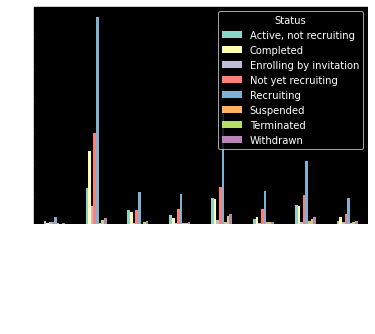

In [216]:
pd.crosstab(covidDF['Phases'],covidDF['Status']).plot.bar()

In [217]:
df = pd.crosstab(covidDF['Phases'],covidDF['Status'])
df.reset_index('Phases')

Status,Phases,"Active, not recruiting",Completed,Enrolling by invitation,Not yet recruiting,Recruiting,Suspended,Terminated,Withdrawn
0,Early Phase 1,7,3,4,5,22,2,0,3
1,Not Applicable,111,226,54,282,647,2,13,19
2,Phase 1,44,38,1,42,98,0,4,7
3,Phase 1|Phase 2,26,17,3,46,92,2,2,4
4,Phase 2,81,78,10,114,343,4,25,30
5,Phase 2|Phase 3,15,20,1,46,102,4,6,6
6,Phase 3,59,56,6,89,196,9,15,20
7,Phase 4,8,22,6,30,81,2,5,7


In [218]:
plt.style.use('dark_background')
iplot(df.iplot(asFigure=True, kind='bar', title='Status for each Phase in the Clinical Study', theme='solar'))

In [219]:
covidDF['Status'].sort_values(ascending=True).iplot(asFigure=True, kind='hist',)

In [220]:
fig = px.bar(covidDF, x=covidDF.groupby('Status')['Status'].count().index, y=covidDF.Status.value_counts(), text=covidDF.Status.value_counts())
fig.update_layout(title='Clinical Study Status', template="plotly_dark", xaxis_title = 'Status', yaxis_title='count')

#### Participants

1. What are the age of the participants in the study?
2. What is total number of participants

In [221]:
covidDF[['Gender', 'Age', 'Enrollment']]

,Gender,Age,Enrollment
0,All,"18 Years and older (Adult, Older Adult)",1000.0
1,All,"18 Years and older (Adult, Older Adult)",60.0
2,All,"18 Years and older (Adult, Older Adult)",500.0
3,All,"Child, Adult, Older Adult",2500.0
4,Female,18 Years to 48 Years (Adult),50.0
...,...,...,...
5778,All,"21 Years to 100 Years (Adult, Older Adult)",566.0
5779,All,"3 Months to 18 Years (Child, Adult)",200.0
5780,All,18 Years to 64 Years (Adult),88.0
5781,All,"8 Years to 20 Years (Child, Adult)",396.0


In [288]:
covidDF.Age.unique()

array(['(Adult, Older Adult)', '(Child, Adult, Older Adult)', '(Adult)',
       '(Child)', '(Child, Adult)', '(Older Adult)'], dtype=object)

In [223]:
#Cleaning the Age
import re
def cleanAge(age):
    if(re.findall(r'\(.*\)',age)):
        return re.findall(r'\(.*\)',age)[0]
    return '('+age+')'
    

covidDF['Age'] = covidDF['Age'].apply(lambda x:cleanAge(x))

In [225]:
covidDF.Age.unique()

array(['(Adult, Older Adult)', '(Child, Adult, Older Adult)', '(Adult)',
       '(Child)', '(Child, Adult)', '(Older Adult)'], dtype=object)

In [249]:
fig = px.bar(covidDF, x=covidDF.groupby('Age')['Enrollment'].count().sort_values(ascending=False).index, y=covidDF.groupby('Age')['Enrollment'].count().sort_values(ascending=False).values,
            text = covidDF.groupby('Age')['Enrollment'].count().sort_values(ascending=False),
            color=covidDF.groupby('Age')['Enrollment'].count().sort_values(ascending=False).index)
fig.update_layout(title = 'Enrollment Count Per Age Group', xaxis_title='Age Group', yaxis_title='Enrollment Count', template='plotly_dark')
fig

In [281]:
gender = pd.DataFrame(covidDF.groupby(['Age'])['Gender'].value_counts()).unstack()
gender

Gender             
Gender                          All Female  Male
Age                                             
(Adult)                       258.0   54.0  23.0
(Adult, Older Adult)         4267.0   76.0  18.0
(Child)                       100.0    1.0   1.0
(Child, Adult)                 94.0   10.0   NaN
(Child, Adult, Older Adult)   774.0   21.0   1.0
(Older Adult)                  74.0    NaN   1.0

In [283]:
from plotly.subplots import make_subplots
i=0
fig = make_subplots(rows=3, cols=2, subplot_titles=list(gender.index))
for row in range(1,4):
    for col in range(1,3):
        dt = gender.iloc[i]
        fig.add_trace(go.Bar(x=dt.Gender.index,y=dt.Gender.values),row = row, col = col)    
        fig.update_layout(template='plotly_dark')
        i+=1

fig